In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
%matplotlib inline

In [41]:
# Load the data
data = pd.read_csv('data/Local_Area_Unemployment_Statistics__Beginning_1976.csv')
data[:10]

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
0,New York State,2018,1,9660300,9165100,495200,5.1%
1,New York State,2017,1,9619800,9115700,504100,5.2%
2,New York State,2017,2,9678400,9168700,509700,5.3%
3,New York State,2017,3,9711000,9258000,453000,4.7%
4,New York State,2017,4,9687000,9265600,421400,4.4%
5,New York State,2017,5,9690500,9261900,428600,4.4%
6,New York State,2017,6,9794300,9341300,453000,4.6%
7,New York State,2017,7,9858500,9372700,485700,4.9%
8,New York State,2017,8,9767100,9285400,481800,4.9%
9,New York State,2017,9,9743400,9296700,446700,4.6%


In [66]:
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis = 1)
d = pd.concat((data, pd.DataFrame({'date': dates})), axis = 1)
d = ny.sort_values(by='date')
d[:10]

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
493,New York State,1976,1,7634700,6780200,854400,11.2%,1976-01-01
494,New York State,1976,2,7623500,6769500,854000,11.2%,1976-02-01
495,New York State,1976,3,7622800,6819300,803500,10.5%,1976-03-01
496,New York State,1976,4,7599200,6855400,743800,9.8%,1976-04-01
497,New York State,1976,5,7561800,6884300,677500,9.0%,1976-05-01
498,New York State,1976,6,7801000,7006500,794500,10.2%,1976-06-01
499,New York State,1976,7,7970700,7131300,839400,10.5%,1976-07-01
500,New York State,1976,8,7895600,7089100,806600,10.2%,1976-08-01
501,New York State,1976,9,7619200,6846800,772400,10.1%,1976-09-01
502,New York State,1976,10,7664400,6908400,756000,9.9%,1976-10-01


In [43]:
# Plot Ny state Labor force Employed and Unemployed
ny = d[d.Area == 'New York State']

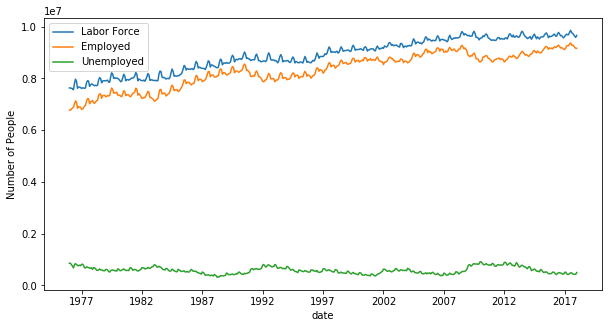

In [70]:
plt.plot(ny.date, ny['Labor Force'], label = 'Labor Force')
plt.plot(ny.date, ny['Employed'], label = 'Employed')
plt.plot(ny.date, ny['Unemployed'], label = 'Unemployed')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('Number of People')
plt.gcf().set_size_inches(10, 5)

## Multiple Plots

In [58]:
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis=1)
d = pd.concat((data,pd.DataFrame({'date':dates})), axis=1)
d = d.sort_values(by='date')
d[:5]

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
493,New York State,1976,1,7634700,6780200,854400,11.2%,1976-01-01
41569,BALANCE OF STATE,1976,1,4520500,4023100,497400,11.0%,1976-01-01
39039,New York City,1976,1,3114200,2757200,357000,11.5%,1976-01-01
23846,New York City Region,1976,1,3114200,2757200,357000,11.5%,1976-01-01
23847,New York City Region,1976,2,3125100,2762400,362700,11.6%,1976-02-01


In [59]:
# Get Different Areas
nyc = d[d.Area == 'New York City']
nys = d[d.Area == 'New York State']
buf = d[d.Area == 'Buffalo City']

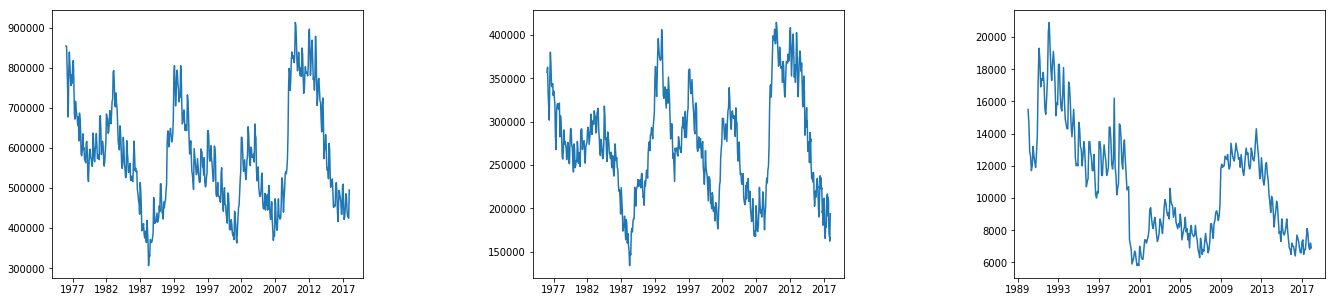

In [63]:
# subplots 1 row 3 colummns
# first subplot
plt.subplot(131)
plt.plot(nys.date, nys['Unemployed'])

# second subplot
plt.subplot(132)
plt.plot(nyc.date, nyc['Unemployed'])

# third subplot
plt.subplot(133)
plt.plot(buf.date, buf['Unemployed'])

plt.tight_layout(pad=0)
plt.gcf().set_size_inches(20, 4)

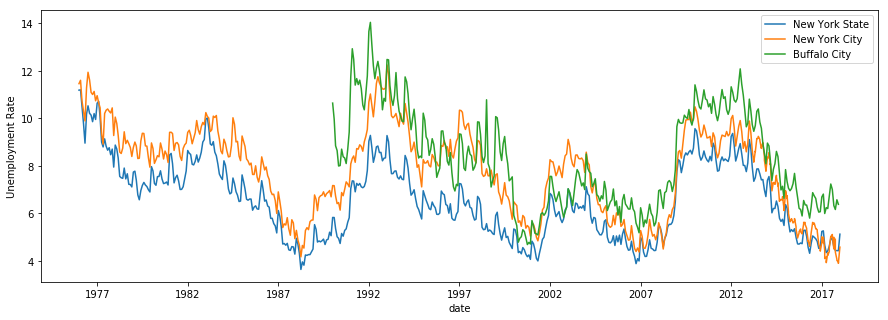

In [67]:
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label = 'New York State')
plt.plot(nyc.date, 100*nyc['Unemployed']/nyc['Labor Force'], label = 'New York City')
plt.plot(buf.date, 100*buf['Unemployed']/buf['Labor Force'], label = 'Buffalo City')

plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('Unemployment Rate')
plt.gcf().set_size_inches(15,5)

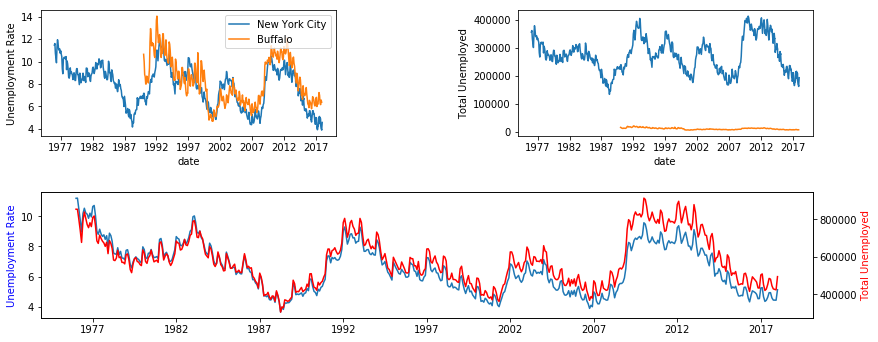

In [65]:
# Grid subplot with subplot2grid
plt.subplot2grid((2,2), (0, 0))
plt.plot(nyc.date, 100*nyc['Unemployed']/nyc['Labor Force'], label='New York City')
plt.plot(buf.date, 100*buf['Unemployed']/buf['Labor Force'], label='Buffalo')
plt.xlabel('date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='best')
plt.subplot2grid((2,2), (0, 1))
plt.plot(nyc.date, nyc['Unemployed'])
plt.plot(buf.date, buf['Unemployed'])
plt.xlabel('date')
plt.ylabel('Total Unemployed')
plt.subplot2grid((2,2), (1, 0), colspan=2)
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label='New York State')
plt.ylabel('Unemployment Rate', color='b')
plt.twinx()
plt.plot(nys.date, nys['Unemployed'], color='r')
plt.ylabel('Total Unemployed', color='r')
plt.xlabel('date')
plt.tight_layout()
plt.gcf().set_size_inches(15,5)